In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:

single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

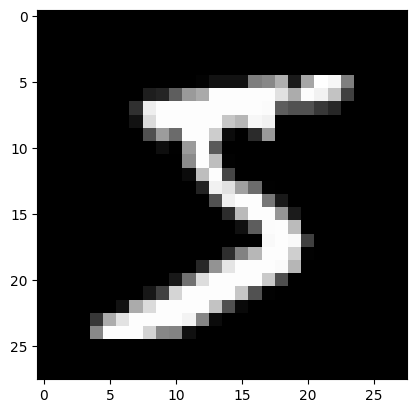

In [ ]:

plt.imshow(single_image,cmap='gray')

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:

X_train_scaled.min()


0.0

In [ ]:

X_train_scaled.max()

1.0

In [ ]:

y_train[0]

5

In [ ]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:

type(y_train_onehot)


numpy.ndarray

In [ ]:

y_train_onehot.shape


(60000, 10)

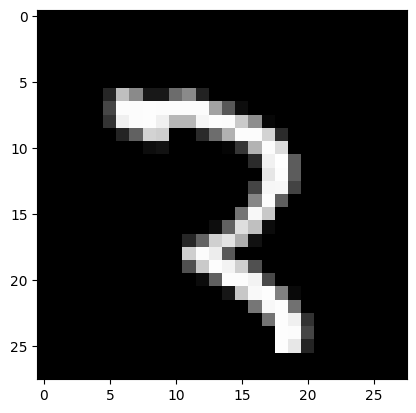

In [ ]:

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
print("DEVADARSHAN A S 212222110007")
model.summary()

DEVADARSHAN A S 212222110007
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print("DEVADARSHAN A S 212222110007")
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))


DEVADARSHAN A S 212222110007
Epoch 1/5
938/938 [==============================] - 26s 28ms/step - loss: 0.1578 - accuracy: 0.9535 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0650 - accuracy: 0.9806 - val_loss: 0.0561 - val_accuracy: 0.9824
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 4/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0448 - val_accuracy: 0.9847
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0423 - val_accuracy: 0.9852


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
print("DEVADARSHAN A S 212222110007")
metrics.head()

DEVADARSHAN A S 212222110007


,loss,accuracy,val_loss,val_accuracy
0,0.157788,0.953500,0.081573,0.9756
1,0.065021,0.980633,0.056123,0.9824
2,0.044783,0.986583,0.053828,0.9827
3,0.034435,0.989550,0.044768,0.9847
4,0.026503,0.991717,0.042293,0.9852


DEVADARSHAN A S 212222110007


<Axes: >

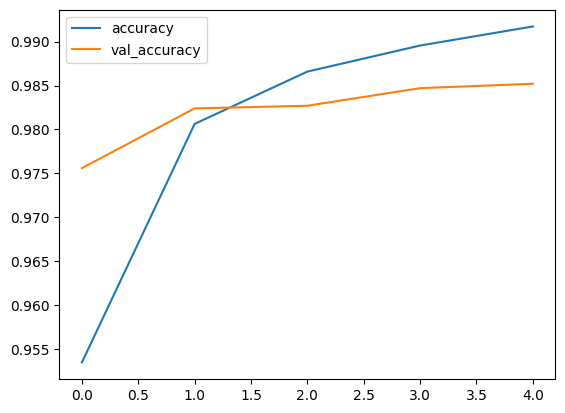

In [ ]:
print("DEVADARSHAN A S 212222110007")
metrics[['accuracy','val_accuracy']].plot()


DEVADARSHAN A S 212222110007


<Axes: >

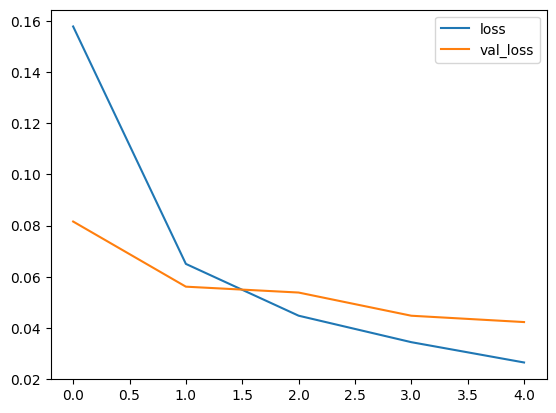

In [ ]:
print("DEVADARSHAN A S 212222110007")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
print("DEVADARSHAN A S 212222110007")
print(confusion_matrix(y_test,x_test_predictions))

DEVADARSHAN A S 212222110007
[[ 965    1    3    0    1    4    4    1    0    1]
 [   0 1130    0    2    0    0    1    0    2    0]
 [   0    2 1018    0    2    1    0    4    4    1]
 [   0    0    2  997    0    6    1    1    3    0]
 [   0    0    0    0  975    0    2    0    0    5]
 [   0    0    0    7    0  884    1    0    0    0]
 [   4    4    0    0    3    5  942    0    0    0]
 [   0    2    9    1    0    0    0 1007    2    7]
 [   2    0    1    5    0    4    3    2  954    3]
 [   1    2    0    3    9    7    0    6    1  980]]


In [ ]:
print("DEVADARSHAN A S 212222110007")
print(classification_report(y_test,x_test_predictions))

DEVADARSHAN A S 212222110007
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:

img = image.load_img('/content/deep 3.jpg')


In [ ]:
print("DEVADARSHAN A S 212222110007")
type(img)


DEVADARSHAN A S 212222110007


PIL.JpegImagePlugin.JpegImageFile

In [ ]:

img = image.load_img('deep 3.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
print("DEVADARSHAN A S 212222110007")
print(x_single_prediction)

DEVADARSHAN A S 212222110007
[3]


DEVADARSHAN A S 212222110007


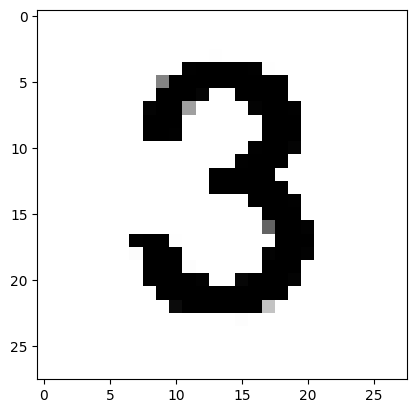

In [ ]:
print("DEVADARSHAN A S 212222110007")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [ ]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print("DEVADARSHAN A S 212222110007")
print(x_single_prediction)

DEVADARSHAN A S 212222110007
[3]
